# Imports

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [7]:
from dataloading import preprocces_for_aug, merge_df

# Read the datasets

In [8]:
# columns
attack_columns = ['Attack ID', 'Card', 'Victim IP', 'Port number', 'Attack code', 'Detect count', 'Significant flag',
                   'Packet speed', 'Data speed', 'Avg packet len', 'Avg source IP count', 'Start time', 'End time', 'Whitelist flag', 'Type']
vector_columns = ['Attack ID', 'Detect count', 'Card', 'Victim IP', 'Port number', 'Attack code', 'Significant flag', 
                  'Packet speed', 'Data speed', 'Avg packet len', 'Source IP count', 'Time']

numerical_cols = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count', 'time_of_day'] # 'victim IP num', 'Port number'

In [9]:
# path to the train files
attacks_path = '../data/raw/attacks.anon.train.csv'
vectors_path = '../data/raw/vectors.anon.train.csv'

val_attacks_path = '../data/raw/attacks.anon.validation.csv'
val_vectors_path = '../data/raw/vectors.anon.validation.csv'

In [10]:
# read the datasets
attack_df = pd.read_csv(attacks_path)
vector_df = pd.read_csv(vectors_path)

val_attack_df = pd.read_csv(val_attacks_path, names= attack_columns)
val_vector_df = pd.read_csv(val_vectors_path, names = vector_columns)

In [11]:
attack_df.head()

,Attack ID,Card,Victim IP,Port number,Attack code,Detect count,Significant flag,Packet speed,Data speed,Avg packet len,Avg source IP count,Start time,End time,Whitelist flag,Type
0,1,sga10gq0,IP_0001,4500,High volume traffic,1,0,55600,73,1383,6,2022-08-08T18:09:36,2022-08-08T18:09:37,0,Normal traffic
1,2,sga10gq0,IP_0002,4500,High volume traffic,1,0,63500,90,1506,1,2022-08-08T18:37:28,2022-08-08T18:37:28,0,Normal traffic
2,3,sga10gq0,IP_0003,1200,High volume traffic,2,0,62700,82,1399,1,2022-08-08T18:41:25,2022-08-08T18:41:26,0,Normal traffic
3,4,sga10gq0,IP_0002,4500,High volume traffic,1,0,59500,85,1486,1,2022-08-08T18:47:49,2022-08-08T18:47:50,0,Normal traffic
4,5,sga10gq0,IP_0004,12347,High volume traffic,2,1,78250,113,1518,1,2022-08-08T18:57:15,2022-08-08T18:58:11,0,Normal traffic


In [12]:
vector_df.head()

,Attack ID,Detect count,Card,Victim IP,Port number,Attack code,Significant flag,Packet speed,Data speed,Avg packet len,Source IP count,Time
0,1,1,sga10gq0,IP_0001,4500,High volume traffic,0,55600,73,1383,6,2022-08-08T18:09:36
1,2,1,sga10gq0,IP_0002,4500,High volume traffic,0,63500,90,1506,1,2022-08-08T18:37:28
2,3,1,sga10gq0,IP_0003,1200,High volume traffic,0,59700,79,1399,1,2022-08-08T18:41:25
3,3,2,sga10gq0,IP_0003,1200,High volume traffic,0,65700,86,1399,1,2022-08-08T18:41:26
4,4,1,sga10gq0,IP_0002,4500,High volume traffic,0,59500,85,1486,1,2022-08-08T18:47:49


In [13]:
val_attack_df.head()

,Attack ID,Card,Victim IP,Port number,Attack code,Detect count,Significant flag,Packet speed,Data speed,Avg packet len,Avg source IP count,Start time,End time,Whitelist flag,Type
0,702942,sga10gq0,IP_60532,0,High volume traffic,3,0,52200,75,1501,1,2023-08-25T18:05:56,2023-08-25T18:08:25,0,Normal traffic
1,702943,sga10gq0,IP_67501,0,High volume traffic,1,0,68000,91,1404,1,2023-08-25T18:06:31,2023-08-25T18:06:32,0,Normal traffic
2,702944,sga10gq0,IP_60976,0,High volume traffic,2,0,69900,86,1284,1,2023-08-25T18:06:43,2023-08-25T18:06:44,0,Normal traffic
3,702945,sga10gq0,IP_67222,0,High volume traffic,2,0,64650,85,1386,1,2023-08-25T18:10:21,2023-08-25T18:12:14,0,Normal traffic
4,702946,sga10gq0,IP_1386,0,High volume traffic,2,0,63500,34,585,1,2023-08-25T18:10:58,2023-08-25T18:11:27,0,Normal traffic


In [14]:
val_vector_df.head()

,Attack ID,Detect count,Card,Victim IP,Port number,Attack code,Significant flag,Packet speed,Data speed,Avg packet len,Source IP count,Time
0,702942,1,sga10gq0,IP_60532,0,High volume traffic,0,51800,74,1506,1,2023-08-25T18:05:56
1,702943,1,sga10gq0,IP_67501,0,High volume traffic,0,68000,91,1404,1,2023-08-25T18:06:31
2,702942,2,sga10gq0,IP_60532,0,High volume traffic,0,53700,76,1494,1,2023-08-25T18:06:40
3,702944,1,sga10gq0,IP_60976,0,High volume traffic,0,81600,100,1287,1,2023-08-25T18:06:43
4,702944,2,sga10gq0,IP_60976,64755,High volume traffic,0,58200,71,1281,1,2023-08-25T18:06:43


# Preprocess the data

In [15]:
# merge the attack and the vector dfs
train_df = merge_df(attack_df, vector_df)
val_df = merge_df(val_attack_df, val_vector_df)

# merge the train and validation datasets
merged_df = pd.concat([train_df, val_df], ignore_index=True)
print(train_df.shape, val_df.shape, merged_df.shape)
merged_df.head()


(586642, 15) (1247266, 15) (1833908, 15)


,Attack ID,Detect count,Card,Victim IP,Port number,Attack code,Significant flag,Packet speed,Data speed,Avg packet len,Source IP count,Time,Start time,End time,Type
0,1,1,sga10gq0,IP_0001,4500,High volume traffic,0,55600,73,1383,6,2022-08-08T18:09:36,2022-08-08T18:09:36,2022-08-08T18:09:37,Normal traffic
1,2,1,sga10gq0,IP_0002,4500,High volume traffic,0,63500,90,1506,1,2022-08-08T18:37:28,2022-08-08T18:37:28,2022-08-08T18:37:28,Normal traffic
2,3,1,sga10gq0,IP_0003,1200,High volume traffic,0,59700,79,1399,1,2022-08-08T18:41:25,2022-08-08T18:41:25,2022-08-08T18:41:26,Normal traffic
3,3,2,sga10gq0,IP_0003,1200,High volume traffic,0,65700,86,1399,1,2022-08-08T18:41:26,2022-08-08T18:41:25,2022-08-08T18:41:26,Normal traffic
4,4,1,sga10gq0,IP_0002,4500,High volume traffic,0,59500,85,1486,1,2022-08-08T18:47:49,2022-08-08T18:47:49,2022-08-08T18:47:50,Normal traffic


In [16]:
# column types
merged_df.dtypes

Attack ID            int64
Detect count         int64
Card                object
Victim IP           object
Port number          int64
Attack code         object
Significant flag     int64
Packet speed         int64
Data speed           int64
Avg packet len       int64
Source IP count      int64
Time                object
Start time          object
End time            object
Type                object
dtype: object

In [17]:
# preproccess the df
merged_df = preprocces_for_aug(merged_df)

In [22]:
merged_df.dtypes

Attack ID                       int64
Detect count                    int64
Card                           object
Victim IP                      object
Port number                     int64
Attack code                    object
Significant flag                int64
Packet speed                    int64
Data speed                      int64
Avg packet len                  int64
Source IP count                 int64
time string                    object
Type                           object
Attack duration               float64
RPC                             int64
RIP                             int64
SYN Attack                      int64
NTP                             int64
Suspicious traffic              int64
SNMP                            int64
WSD                             int64
TFTP                            int64
CLDAP                           int64
Generic UDP                     int64
Memcached                       int64
ICMP                            int64
RDP         

In [23]:
# drop columns
cols_to_drop = ['Card', 'Attack ID', 'Detect count', 'Victim IP', 'Attack code', 'time string', 'time']

merged_df = merged_df.drop(cols_to_drop, axis=1, errors='ignore')

print(len(merged_df.columns))
merged_df.dtypes

33


Port number              int64
Significant flag         int64
Packet speed             int64
Data speed               int64
Avg packet len           int64
Source IP count          int64
Type                    object
Attack duration        float64
RPC                      int64
RIP                      int64
SYN Attack               int64
NTP                      int64
Suspicious traffic       int64
SNMP                     int64
WSD                      int64
TFTP                     int64
CLDAP                    int64
Generic UDP              int64
Memcached                int64
ICMP                     int64
RDP                      int64
ACK Attack               int64
TCP Anomaly              int64
Sentinel                 int64
SSDP                     int64
IPv4 fragmentation       int64
CoAP                     int64
CHARGEN                  int64
DNS                      int64
High volume traffic      int64
victim IP num            int64
is_weekday               int64
time_of_

# Augmemtation

We are using the SMOTE algorithm

In [24]:
# Define numerical and target columns
numerical_cols = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count', 'time_of_day', 'Attack duration']
high_cardinality = ['Port number', 'victim IP num']
target_col = 'Type'
non_numeric_cols = []
for col in merged_df.columns:
    if col not in numerical_cols:
        non_numeric_cols.append(col)
non_numeric_cols

['Port number',
 'Significant flag',
 'Type',
 'RPC',
 'RIP',
 'SYN Attack',
 'NTP',
 'Suspicious traffic',
 'SNMP',
 'WSD',
 'TFTP',
 'CLDAP',
 'Generic UDP',
 'Memcached',
 'ICMP',
 'RDP',
 'ACK Attack',
 'TCP Anomaly',
 'Sentinel',
 'SSDP',
 'IPv4 fragmentation',
 'CoAP',
 'CHARGEN',
 'DNS',
 'High volume traffic',
 'victim IP num',
 'is_weekday']

In [25]:
# get distribution of large cardinality categorical columns: victim ip num, port number
port_distributions = {}
ip_distributions = {}
for t in merged_df['Type'].unique():
    port_values = merged_df[merged_df['Type'] == t]['Port number']
    port_distributions[t] = port_values.value_counts(normalize=True)
    ip_values = merged_df[merged_df['Type'] == t]['victim IP num']
    ip_distributions[t] = ip_values.value_counts(normalize=True)

In [26]:
# Define preprocessing steps for numerical columns
numerical_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols)
], remainder='passthrough')

In [27]:
# fit the scaler
df_scaled = preprocessor.fit_transform(merged_df)

# Convert the result back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = numerical_cols + non_numeric_cols)
df_scaled.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Port number,Significant flag,Type,RPC,...,TCP Anomaly,Sentinel,SSDP,IPv4 fragmentation,CoAP,CHARGEN,DNS,High volume traffic,victim IP num,is_weekday
0,-0.219791,-0.165377,0.513485,-0.079065,0.729704,-0.404967,4500,0,Normal traffic,0,...,0,0,0,0,0,0,0,1,1,1
1,-0.173919,-0.060541,0.772795,-0.089272,0.798683,-0.405082,4500,0,Normal traffic,0,...,0,0,0,0,0,0,0,1,2,1
2,-0.195984,-0.128376,0.547216,-0.089272,0.80846,-0.404967,1200,0,Normal traffic,0,...,0,0,0,0,0,0,0,1,3,1
3,-0.161145,-0.085208,0.547216,-0.089272,0.808501,-0.404967,1200,0,Normal traffic,0,...,0,0,0,0,0,0,0,1,3,1
4,-0.197146,-0.091375,0.730631,-0.089272,0.824302,-0.404967,4500,0,Normal traffic,0,...,0,0,0,0,0,0,0,1,2,1


In [28]:
# drop the target column
df_scaled = df_scaled.drop('Type', axis=1)
df_scaled.columns

Index(['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count',
       'time_of_day', 'Attack duration', 'Port number', 'Significant flag',
       'RPC', 'RIP', 'SYN Attack', 'NTP', 'Suspicious traffic', 'SNMP', 'WSD',
       'TFTP', 'CLDAP', 'Generic UDP', 'Memcached', 'ICMP', 'RDP',
       'ACK Attack', 'TCP Anomaly', 'Sentinel', 'SSDP', 'IPv4 fragmentation',
       'CoAP', 'CHARGEN', 'DNS', 'High volume traffic', 'victim IP num',
       'is_weekday'],
      dtype='object')

In [29]:
# drop high cardinality columns\n",
df_scaled = df_scaled.drop(['Port number','victim IP num'], axis=1)
non_numeric_cols = [col for col in non_numeric_cols if col not in high_cardinality]
df_scaled.columns

Index(['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count',
       'time_of_day', 'Attack duration', 'Significant flag', 'RPC', 'RIP',
       'SYN Attack', 'NTP', 'Suspicious traffic', 'SNMP', 'WSD', 'TFTP',
       'CLDAP', 'Generic UDP', 'Memcached', 'ICMP', 'RDP', 'ACK Attack',
       'TCP Anomaly', 'Sentinel', 'SSDP', 'IPv4 fragmentation', 'CoAP',
       'CHARGEN', 'DNS', 'High volume traffic', 'is_weekday'],
      dtype='object')

In [30]:
df_scaled.dtypes

Packet speed           object
Data speed             object
Avg packet len         object
Source IP count        object
time_of_day            object
Attack duration        object
Significant flag       object
RPC                    object
RIP                    object
SYN Attack             object
NTP                    object
Suspicious traffic     object
SNMP                   object
WSD                    object
TFTP                   object
CLDAP                  object
Generic UDP            object
Memcached              object
ICMP                   object
RDP                    object
ACK Attack             object
TCP Anomaly            object
Sentinel               object
SSDP                   object
IPv4 fragmentation     object
CoAP                   object
CHARGEN                object
DNS                    object
High volume traffic    object
is_weekday             object
dtype: object

In [31]:
for col in numerical_cols:
    df_scaled[col] = df_scaled[col].astype("float64")

for col in non_numeric_cols:
    if col != 'Type':
        df_scaled[col] = df_scaled[col].astype("int32")

In [32]:
df_scaled.dtypes

Packet speed           float64
Data speed             float64
Avg packet len         float64
Source IP count        float64
time_of_day            float64
Attack duration        float64
Significant flag         int32
RPC                      int32
RIP                      int32
SYN Attack               int32
NTP                      int32
Suspicious traffic       int32
SNMP                     int32
WSD                      int32
TFTP                     int32
CLDAP                    int32
Generic UDP              int32
Memcached                int32
ICMP                     int32
RDP                      int32
ACK Attack               int32
TCP Anomaly              int32
Sentinel                 int32
SSDP                     int32
IPv4 fragmentation       int32
CoAP                     int32
CHARGEN                  int32
DNS                      int32
High volume traffic      int32
is_weekday               int32
dtype: object

In [33]:
df_scaled.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Significant flag,RPC,RIP,SYN Attack,...,ACK Attack,TCP Anomaly,Sentinel,SSDP,IPv4 fragmentation,CoAP,CHARGEN,DNS,High volume traffic,is_weekday
0,-0.219791,-0.165377,0.513485,-0.079065,0.729704,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-0.173919,-0.060541,0.772795,-0.089272,0.798683,-0.405082,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-0.195984,-0.128376,0.547216,-0.089272,0.808460,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,-0.161145,-0.085208,0.547216,-0.089272,0.808501,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,-0.197146,-0.091375,0.730631,-0.089272,0.824302,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [34]:
# Apply SMOTE to the combined features and target
normal_count = merged_df[merged_df['Type'] == "Normal traffic"].shape[0]
strategy = { "Normal traffic": normal_count, "DDoS attack": int(0.7 * normal_count), "Suspicious traffic": int(0.7 * normal_count)}
smote = SMOTE(sampling_strategy= strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_scaled, merged_df[target_col])

# Transform augmented data

In [35]:
# Reshape the synthetic samples back into the original shape of the array column
synthetic_df = pd.DataFrame(X_resampled, columns=df_scaled.columns)
synthetic_df[target_col] = y_resampled
synthetic_df.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Significant flag,RPC,RIP,SYN Attack,...,TCP Anomaly,Sentinel,SSDP,IPv4 fragmentation,CoAP,CHARGEN,DNS,High volume traffic,is_weekday,Type
0,-0.219791,-0.165377,0.513485,-0.079065,0.729704,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
1,-0.173919,-0.060541,0.772795,-0.089272,0.798683,-0.405082,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
2,-0.195984,-0.128376,0.547216,-0.089272,0.808460,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
3,-0.161145,-0.085208,0.547216,-0.089272,0.808501,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
4,-0.197146,-0.091375,0.730631,-0.089272,0.824302,-0.404967,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic


In [36]:
print(synthetic_df.shape)
synthetic_df['Type'].value_counts()

(3283519, 31)


Type
Normal traffic        1368133
Suspicious traffic     957693
DDoS attack            957693
Name: count, dtype: int64

In [37]:
# Create a new StandardScaler instance and fit it on the original data
scaler = StandardScaler()
scaler.fit(merged_df[numerical_cols])

# Inverse transform the numerical columns
final_numerical_cols = scaler.inverse_transform(synthetic_df[numerical_cols])

# Replace the transformed numerical columns with the original values
synthetic_df[numerical_cols] = final_numerical_cols

synthetic_df.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Significant flag,RPC,RIP,SYN Attack,...,TCP Anomaly,Sentinel,SSDP,IPv4 fragmentation,CoAP,CHARGEN,DNS,High volume traffic,is_weekday,Type
0,55600.0,73.0,1383.0,6.0,65376.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
1,63500.0,90.0,1506.0,1.0,67048.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
2,59700.0,79.0,1399.0,1.0,67285.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
3,65700.0,86.0,1399.0,1.0,67286.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
4,59500.0,85.0,1486.0,1.0,67669.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic


In [38]:
# convert columns
# round numericals
for col in numerical_cols:
  synthetic_df[col] = synthetic_df[col].apply(lambda x: int(np.round(x)))
synthetic_df.head()

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Significant flag,RPC,RIP,SYN Attack,...,TCP Anomaly,Sentinel,SSDP,IPv4 fragmentation,CoAP,CHARGEN,DNS,High volume traffic,is_weekday,Type
0,55600,73,1383,6,65376,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
1,63500,90,1506,1,67048,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
2,59700,79,1399,1,67285,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
3,65700,86,1399,1,67286,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic
4,59500,85,1486,1,67669,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Normal traffic


In [39]:
# add synthetic label to new datapoints
synthetic_df['is_synthetic'] = synthetic_df.index >= merged_df.shape[0]
synthetic_df[synthetic_df['is_synthetic'] == True]

,Packet speed,Data speed,Avg packet len,Source IP count,time_of_day,Attack duration,Significant flag,RPC,RIP,SYN Attack,...,Sentinel,SSDP,IPv4 fragmentation,CoAP,CHARGEN,DNS,High volume traffic,is_weekday,Type,is_synthetic
1833902,55955,5,97,394,22954,76,0,0,0,0,...,0,0,0,0,0,0,0,1,DDoS attack,True
1833903,64729,63,943,1,61919,12086,0,0,0,0,...,0,0,0,0,0,0,1,1,DDoS attack,True
1833904,62478,6,113,444,54795,463,0,0,0,0,...,0,0,0,0,0,0,0,1,DDoS attack,True
1833905,70819,100,1490,2,62122,4290,0,0,0,0,...,0,0,0,0,0,0,1,1,DDoS attack,True
1833906,71283,72,1065,1,24290,41009,0,0,0,0,...,0,0,0,0,0,0,1,1,DDoS attack,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283514,86294,4,58,1,35781,15658,0,0,0,0,...,0,0,0,0,0,0,1,1,Suspicious traffic,True
3283515,84940,103,1296,4,42123,31,1,0,0,0,...,0,0,0,0,0,0,1,1,Suspicious traffic,True
3283516,84012,4,58,1,23673,15599,0,0,0,0,...,0,0,0,0,0,0,1,1,Suspicious traffic,True
3283517,80789,92,1323,1,53142,8807,0,0,0,0,...,0,0,0,0,0,0,1,1,Suspicious traffic,True


In [40]:
def sample_port(row):
    t = row['Type']
    port_distribution = port_distributions[t]
    return np.random.choice(port_distribution.index, p=port_distribution.values)

def sample_ip(row):
    t = row['Type']
    ip_distribution = ip_distributions[t]
    return np.random.choice(ip_distribution.index, p=ip_distribution.values)

In [46]:
# add port number and victim ip number
# add columns
og_df = synthetic_df[synthetic_df['is_synthetic'] == False]
new_df = synthetic_df[synthetic_df['is_synthetic'] == True]

# add original values
og_df['Port number'] = merged_df['Port number']
og_df['victim IP num'] = merged_df['victim IP num']

# add new values
new_df['Port number'] = new_df.apply(sample_port, axis=1)
new_df['victim IP num'] = new_df.apply(sample_ip, axis=1)

<ipython-input-46-eb54c2a00c74>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_df['Port number'] = merged_df['Port number']
<ipython-input-46-eb54c2a00c74>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_df['victim IP num'] = merged_df['victim IP num']
<ipython-input-46-eb54c2a00c74>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [48]:
complete_synthetic_df = pd.concat([og_df, new_df], ignore_index=True)
complete_synthetic_df.shape

(3283519, 34)

In [50]:
# save the augmented data
complete_synthetic_df.to_csv('../data/preprocessed/augmented_vectors.csv', index = False)

# Analyse new dataset

In [52]:
vector_df = pd.read_csv('../data/preprocessed/augmented_vectors.csv')

Type
Normal traffic        1368133
Suspicious traffic     957693
DDoS attack            957693
Name: count, dtype: int64


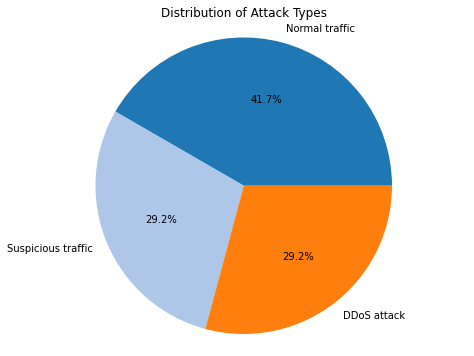

In [54]:
# see how many records are in different classes
value_counts = vector_df['Type'].value_counts()
labels = sorted(value_counts.index)
print(value_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(value_counts.values, labels = value_counts.index,  autopct='%1.1f%%', colors = plt.cm.tab20.colors)
plt.axis('equal')
plt.title("Distribution of Attack Types")

plt.show()


Type
Suspicious traffic    876155
DDoS attack           573462
Name: count, dtype: int64


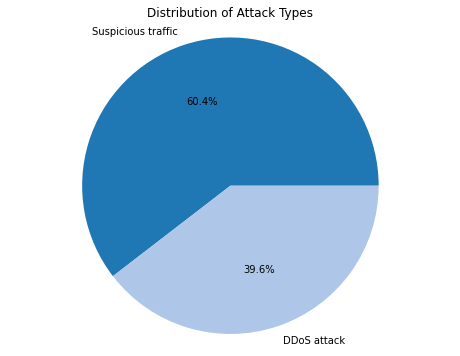

In [55]:
# see how many records are in different classes in the synthetic data
value_counts = vector_df[vector_df['is_synthetic'] == True]['Type'].value_counts()
labels = sorted(value_counts.index)
print(value_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(value_counts.values, labels = value_counts.index,  autopct='%1.1f%%', colors = plt.cm.tab20.colors)
plt.axis('equal')
plt.title("Distribution of Attack Types")

plt.show()

In [56]:
# import functions
from visualise import calculate_zscores, create_violin_plots

In [57]:
vector_df['Type'].value_counts()

Type
Normal traffic        1368133
Suspicious traffic     957693
DDoS attack            957693
Name: count, dtype: int64

In [58]:
list(vector_df['Type'].unique())

['Normal traffic', 'Suspicious traffic', 'DDoS attack']

In [59]:
labels

['DDoS attack', 'Suspicious traffic']

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


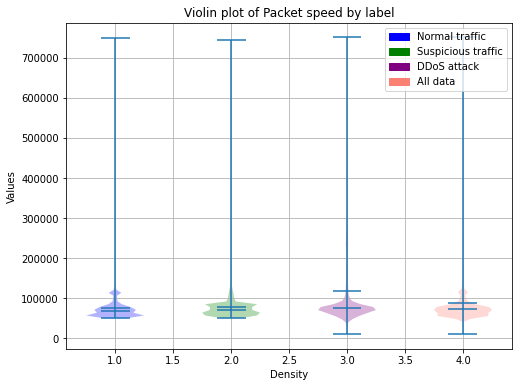

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


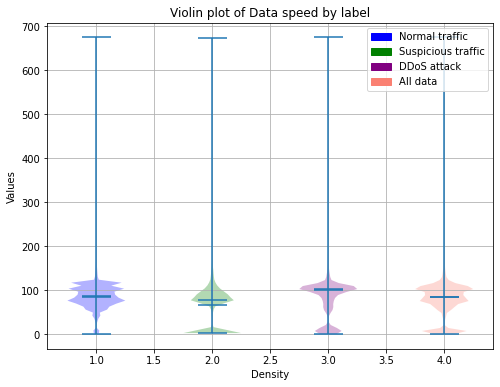

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


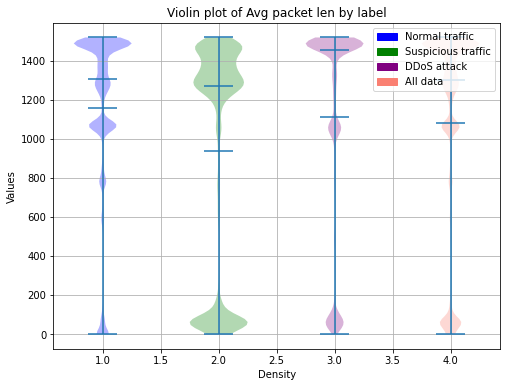

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


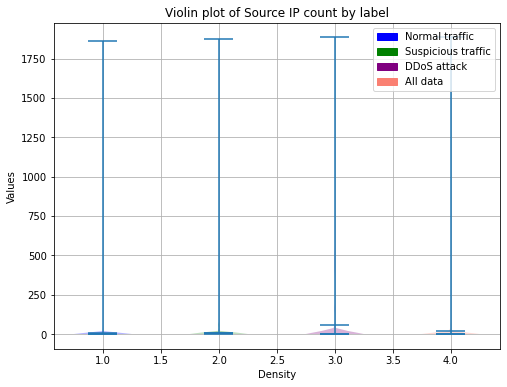

In [61]:
columns_to_plot = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count']

for col in columns_to_plot:
  zscores = calculate_zscores(vector_df, col)
  create_violin_plots(vector_df, col, zscores, threshold = 3, labels= list(vector_df['Type'].unique()))

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


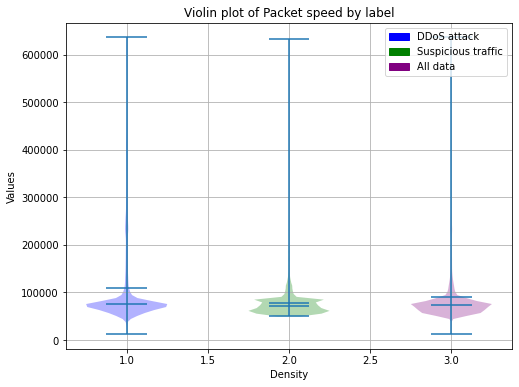

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


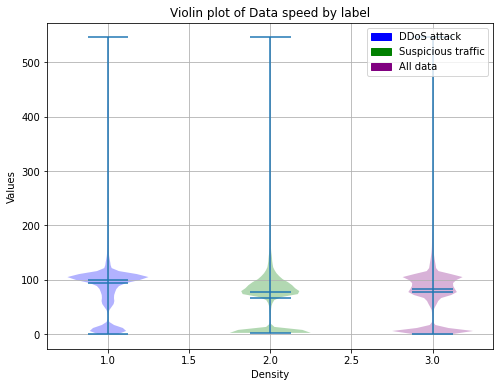

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


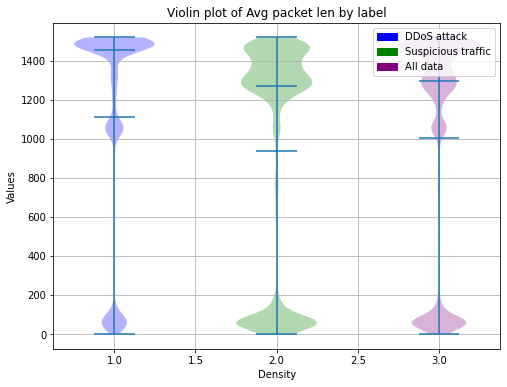

c:\bme\2. félév\adatlab\adaml_24\src\visualise.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0), 1, 1, color=color, edgecolor='black') for color in colors]


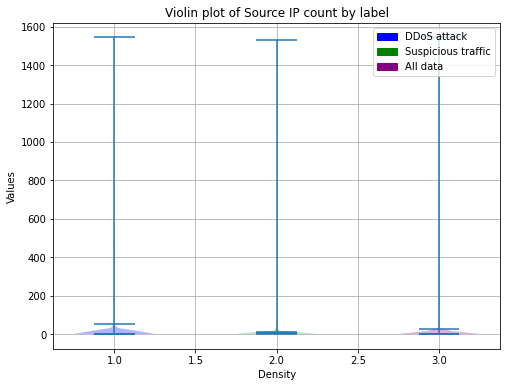

In [64]:
columns_to_plot = ['Packet speed', 'Data speed', 'Avg packet len', 'Source IP count']

for col in columns_to_plot:
  zscores = calculate_zscores(vector_df[vector_df['is_synthetic'] == True], col)
  create_violin_plots(vector_df[vector_df['is_synthetic'] == True], col, zscores, threshold = 2, labels=list(vector_df[vector_df['is_synthetic'] == True]['Type'].unique()), synth = True)